<a href="https://colab.research.google.com/github/NirajDataAnalytics/Time-Series-Analysis/blob/main/Advanced_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
df=pd.read_csv('/content/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [5]:
df.Month=pd.to_datetime(df.Month)
df=df.set_index('Month')
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [6]:
df.isna().sum()

,0
Monthly beer production,0


In [7]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [9]:
df.dtypes

,0
Monthly beer production,float64


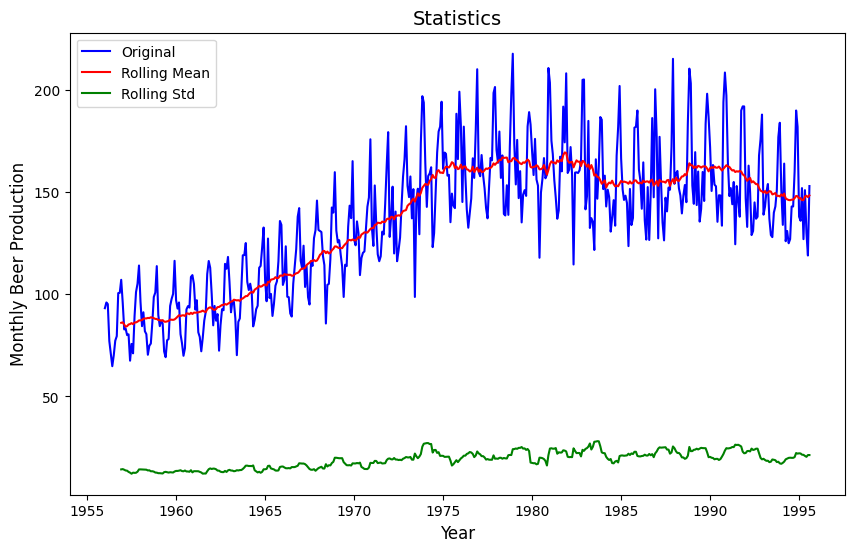

In [10]:
rolling_mean=df.rolling(window=12).mean()
rolling_std=df.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(df, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.xlabel('Year', size=12)
plt.ylabel('Monthly Beer Production', size=12)
plt.legend(loc='upper left')
plt.title('Statistics', size=14)
plt.show()

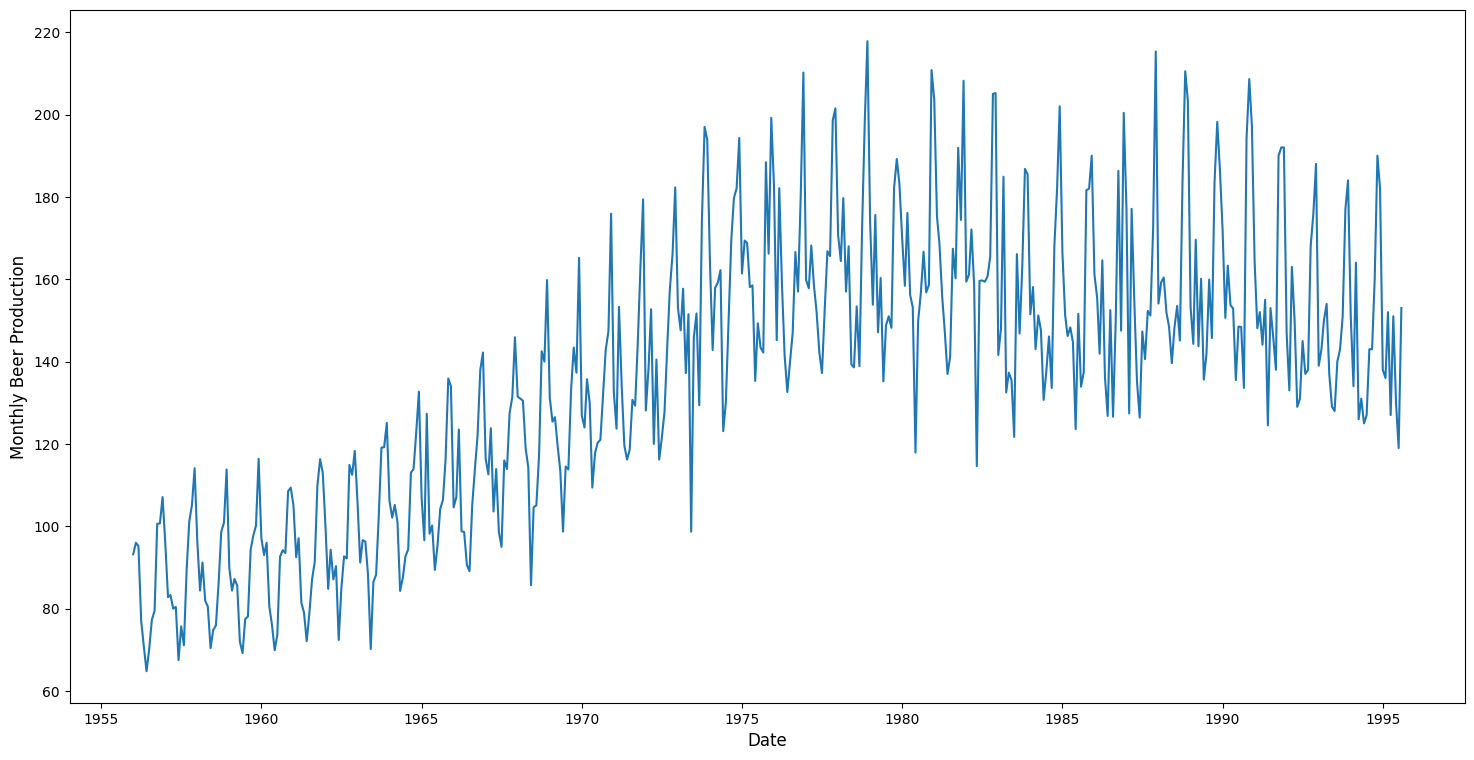

In [11]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df['Monthly beer production'], linestyle='-')
plt.xlabel('Date', size=12)
plt.ylabel('Monthly Beer Production', size=12)
plt.show()

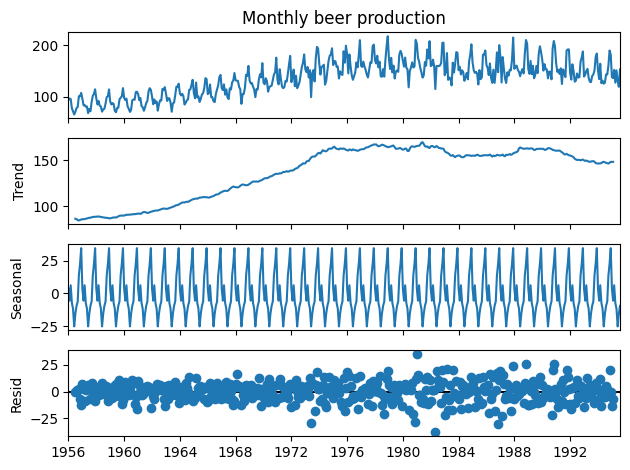

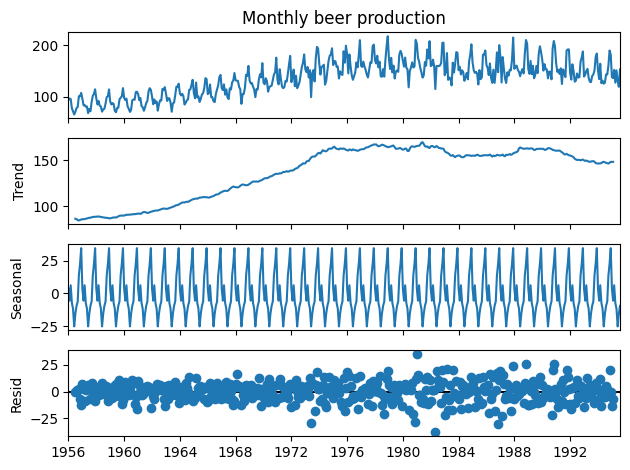

In [12]:
decomposition=seasonal_decompose(df['Monthly beer production'], model='add')
decomposition.plot()

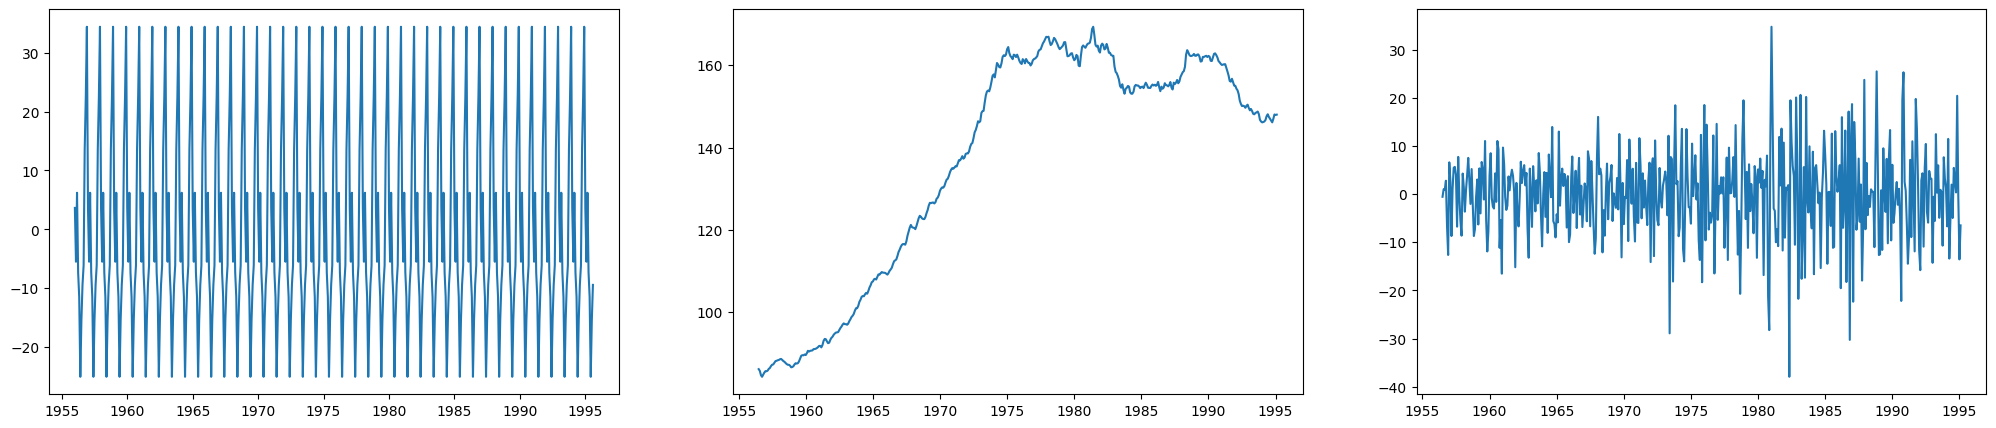

In [13]:
plt.figure(figsize=(25,5))
decomposition=seasonal_decompose(df['Monthly beer production'], model='add')
plt.subplot(1,3,1)
plt.plot(decomposition.seasonal)

plt.subplot(1,3,2)
plt.plot(decomposition.trend)

plt.subplot(1,3,3)
plt.plot(decomposition.resid)

In [14]:
train_data=df[: len(df)-12]
test_data=df[len(df)-12:]

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
arima_model=SARIMAX(train_data['Monthly beer production'], order=(2,1,1), seasonal_order=(4,0,3,12))
arima_result=arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.868
Date:                                    Mon, 26 Aug 2024   AIC                           3437.737
Time:                                            06:31:54   BIC                           3483.252
Sample:                                        01-01-1956   HQIC                          3455.655
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1214      0.042     -2.922      0.003      -0.203      -0.040
ar.L2         -0.1793      0.044     -4.065      0.000      -0.266      -0.093
ma.L1         -0.8409      0.028    -30.138      0.000      -0.896      -0.786
ar.S.L12       1.7515      0.107     16.359      0.000       1.542       1.961
ar.S.L24      -1.6051      0.210     -7.649      0.000      -2.016      -1.194
ar.S.L36       0.7830      0.169      4.644      0.000       0.453       1.113
ar.S.L48       0.0693      0.060      1.152      0.249      -0.049       0.187
ma.S.L12      -1.5602      0.117    -13.297      0.000      -1.790      -1.330
ma.S.L24       1.4064      0.198      7.088      0.000       1.017       1.795
ma.S.L36      -0.6792      0.118     -5.758      0.000      -0.910      -0.448
sigma2        84.8200      5.045     16.812      0.000      74.932      94.708
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                39.40
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
arima_pred=arima_result.predict(start=len(train_data), end=len(df)-1,type='levels').rename('ARIMA Prediction')
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,ARIMA Prediction
1994-09-01,134.458442
1994-10-01,157.224115
1994-11-01,181.382726
1994-12-01,183.886059
1995-01-01,144.589497
1995-02-01,137.186397
1995-03-01,151.482611
1995-04-01,133.447860
1995-05-01,138.078729
1995-06-01,120.790795


<Axes: xlabel='Month'>

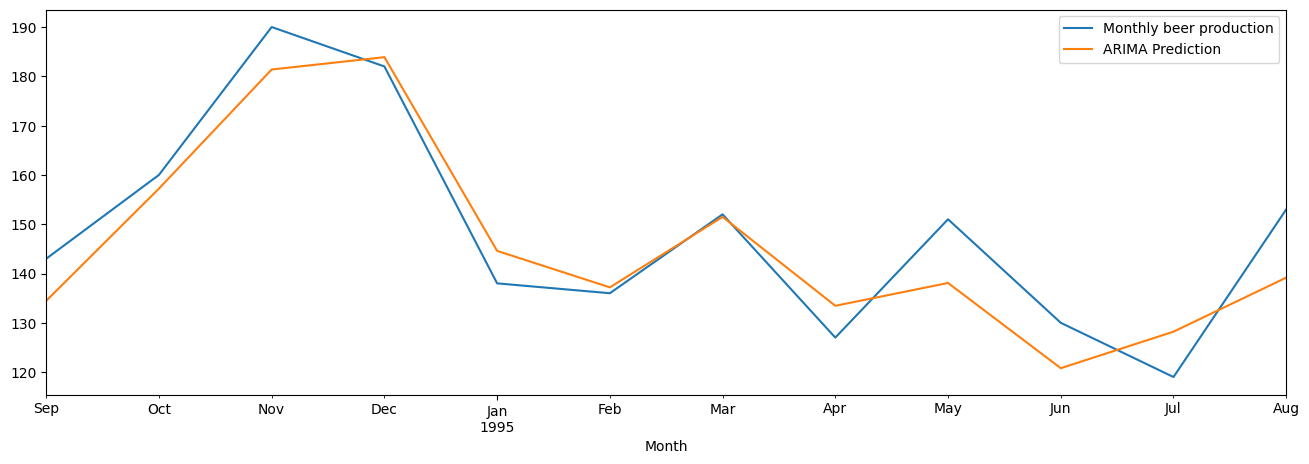

In [18]:
test_data['Monthly beer production'].plot(figsize=(16,5), legend=True)
arima_pred.plot(legend=True)

In [19]:
from statsmodels.tools.eval_measures import rmse

In [20]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_rmse_error

8.025519026414937

In [21]:
test_data['ARIMA_Predictions'] = arima_pred
test_data

<ipython-input-21-4f171bc91ed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


,Monthly beer production,ARIMA_Predictions
Month,,
1994-09-01,143.0,134.458442
1994-10-01,160.0,157.224115
1994-11-01,190.0,181.382726
1994-12-01,182.0,183.886059
1995-01-01,138.0,144.589497
1995-02-01,136.0,137.186397
1995-03-01,152.0,151.482611
1995-04-01,127.0,133.447860
1995-05-01,151.0,138.078729


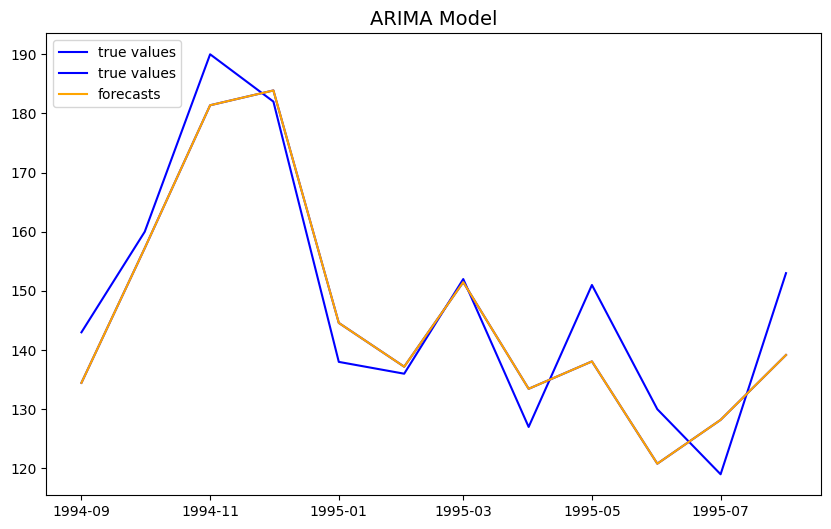

In [22]:
plt.figure(figsize = (10,6))
plt.plot(test_data, label = "true values", color = "blue")
plt.plot(arima_pred,label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()

In [23]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.40895564334816
RMSE Error: 8.025519026414937
Mean: 136.3953781512605


In [24]:
test_data['ARIMA_Predictions'] = arima_pred

<ipython-input-24-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred
